In [1]:
#istallazioni

!pip install pandas
!pip install -U scikit-learn
!pip install matplotlib
!pip install numpy
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#importo librerie

import numpy as np 
import pandas as pd
import seaborn as sns #libreria per visuzlizzazione di dati
import matplotlib.pyplot as plt

In [3]:
#importo test e train
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

churn = test.append(train)

churn

,Unnamed: 0,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,4868,0,5890,15708650,Fullwood,727,France,Female,31,2,52192.08,2,0,1,160383.47
1,2805,0,6207,15776124,Mann,802,Spain,Male,51,7,0.00,1,0,1,40855.79
2,7833,0,3305,15676513,Burns,601,Germany,Male,35,8,71553.83,1,1,0,177384.45
3,2272,0,673,15721024,Wickens,642,France,Male,26,0,0.00,1,0,0,47472.68
4,7698,0,3421,15654519,Hassall,680,France,Male,31,1,0.00,2,1,1,3148.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,7498,0,9761,15632143,Lung,652,France,Male,31,2,119148.55,1,0,0,149740.22
6396,1291,0,3578,15574296,Kambinachi,757,France,Male,23,2,80673.96,2,1,0,93991.65
6397,3114,0,1084,15692583,Udobata,678,France,Female,32,5,0.00,2,1,0,90284.47
6398,4314,0,7353,15809800,Korovina,726,France,Female,38,4,0.00,2,0,0,6787.48


# Pulizia dati

In [4]:
#verifico se ci sono valori mancanti nel dataset

churn.isnull().sum() #numero valori mancanti per ogni stat

Unnamed: 0         0
Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [5]:
churn.isna().sum()

Unnamed: 0         0
Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [6]:
#sembra non ci siano valori mancanti, non è quindi necessario effettuare una pilizia da quel punto di vista
#rimuovo  comunquele righe con valori NA per prevenire problemi se il dataset dovesse cambiare
churn.dropna(axis=0, how='any')
churn

,Unnamed: 0,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,4868,0,5890,15708650,Fullwood,727,France,Female,31,2,52192.08,2,0,1,160383.47
1,2805,0,6207,15776124,Mann,802,Spain,Male,51,7,0.00,1,0,1,40855.79
2,7833,0,3305,15676513,Burns,601,Germany,Male,35,8,71553.83,1,1,0,177384.45
3,2272,0,673,15721024,Wickens,642,France,Male,26,0,0.00,1,0,0,47472.68
4,7698,0,3421,15654519,Hassall,680,France,Male,31,1,0.00,2,1,1,3148.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,7498,0,9761,15632143,Lung,652,France,Male,31,2,119148.55,1,0,0,149740.22
6396,1291,0,3578,15574296,Kambinachi,757,France,Male,23,2,80673.96,2,1,0,93991.65
6397,3114,0,1084,15692583,Udobata,678,France,Female,32,5,0.00,2,1,0,90284.47
6398,4314,0,7353,15809800,Korovina,726,France,Female,38,4,0.00,2,0,0,6787.48


In [7]:
#controllo se ci sono righe duplicate (più righe relative allo stesso cliente)

dupli=churn.duplicated(subset='CustomerId')    #serie con valori booleani relativi a se ogni riga e duplicata o no
duplitrue=dupli[dupli==True]                   #filtro per riconoscere i duplicati
duplitrue.size                                 #numero duplicati

0

In [8]:
#non ci sono nemmeno duplicati, non è necessario rimuovere nessuna riga
#rimuovo  comunquele righe duplicate per prevenire problemi se il dataset dovesse cambiare
churn.drop_duplicates(subset='CustomerId')

#ci sono alcune colonne che non sono necessarie per il training del nostro modello, procedo quindi a rimuoverle
parametri=['CreditScore','Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']
relevant=churn[parametri]
relevant

#ho rimosso in questa maniera, anziché usare il drop perché a volte Jupyter aggiunge alcune colonne per conto suo

#non so se è un bug o un problema di configurazione. Nel dubbio, in questa maniera non vado a rimuovere colonne che
#potrebbero non esistere su altre esecuzioni di questo notebook

#a questo punto relevant contiene 8000 righe ed 11 colonne 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,727,France,Female,31,2,52192.08,2,0,1,160383.47,0
1,802,Spain,Male,51,7,0.00,1,0,1,40855.79,0
2,601,Germany,Male,35,8,71553.83,1,1,0,177384.45,0
3,642,France,Male,26,0,0.00,1,0,0,47472.68,0
4,680,France,Male,31,1,0.00,2,1,1,3148.20,0
...,...,...,...,...,...,...,...,...,...,...,...
6395,652,France,Male,31,2,119148.55,1,0,0,149740.22,0
6396,757,France,Male,23,2,80673.96,2,1,0,93991.65,0
6397,678,France,Female,32,5,0.00,2,1,0,90284.47,0
6398,726,France,Female,38,4,0.00,2,0,0,6787.48,0


# Analisi dati

/home/g/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Uscita (boolean)', ylabel='Numero utenti'>

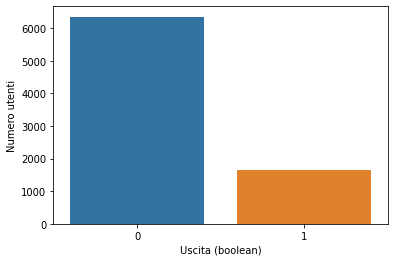

In [9]:
#vedo quanti clienti sono usciti e quanti no (0 = non uscito ; 1 = uscito)

y = churn["Exited"].value_counts()
x = y.index
y = y.values
plt.xlabel('Uscita (boolean)')
plt.ylabel('Numero utenti')
sns.barplot(x, y)

In [10]:
usciti=churn['Exited'].value_counts()
usciti1=usciti[1]
usciti0=usciti[0]
percentualeUsciti=usciti1/(usciti1+usciti0)*100
percentualeUsciti

20.549999999999997

In [11]:
#coloro che hanno cambiato banca sono circa il 20% di tutti gli utenti
#vi sono molti più utenti che sono rimasti, rispetto a quelli che hanno abbandonato la banca
#tuttavia, gli utenti che hanno cambiato banca non sono pochi

#a questo punto possiamo scendere ancora più a fondo, analizzando le relazioni tra le varie stats
churn[['Balance', 'Exited']].query('Exited==1')['Balance']

7            0.00
8        98807.45
9            0.00
19      222267.63
23           0.00
          ...    
6390    111071.36
6392    206014.94
6393    136444.25
6394     95053.10
6399     99587.43
Name: Balance, Length: 1644, dtype: float64

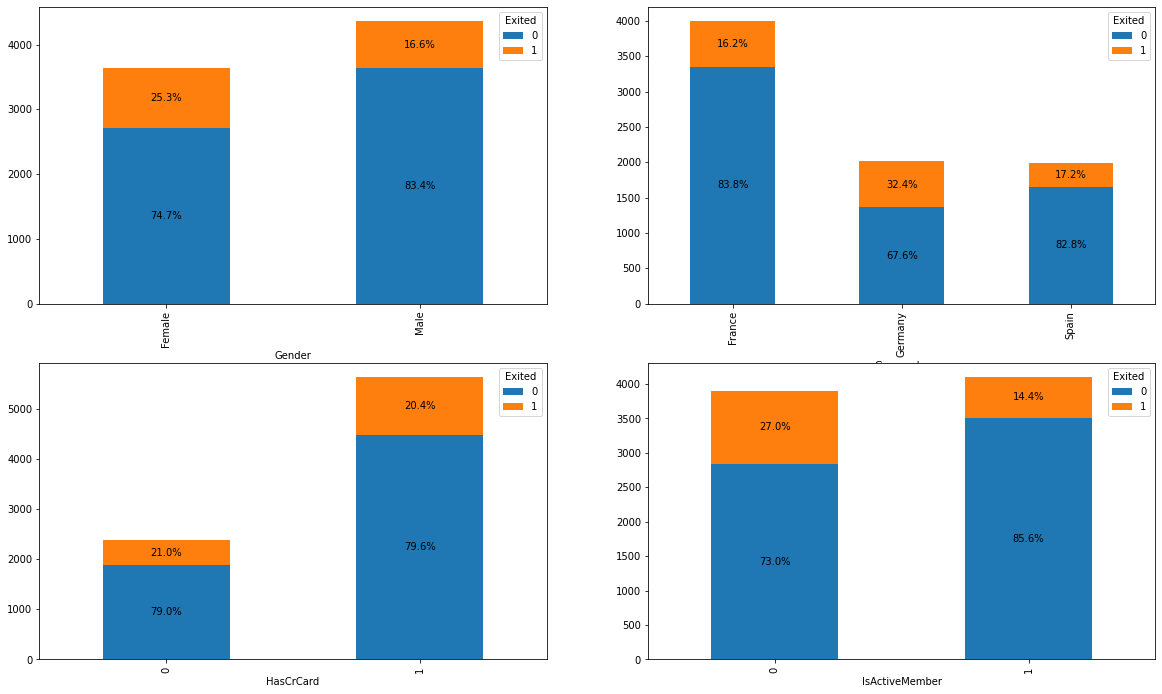

In [12]:
def Reverse(lst):
    return [ele for ele in reversed(lst)]

def Percentage(feature,rev,pos):
    n=0
    val=(churn[feature].value_counts().index)
    if(rev):
        val=(Reverse(churn[feature].value_counts().index))
    
    for valore in val:
        value=churn[[feature,'Exited']].value_counts()
        tot=churn[feature].value_counts()[valore]
        value1=value[valore,1]/tot*100
        value0=value[valore,0]/tot*100
        axarr[pos[0]][pos[1]].text(n, tot/100*value0/2, str(np.round(value0, 1)) + '%', va='center', ha='center', rotation=0)
        axarr[pos[0]][pos[1]].text(n, tot-tot/100*(value1/2), str(np.round(value1, 1)) + '%', va='center', ha='center', rotation=0)
        n=n+1


        
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

churn.groupby(["Gender", "Exited"]).size().unstack().plot(kind='bar', stacked=True,ax=axarr[0][0])
Percentage('Gender',True,[0,0])

churn.groupby(["Geography", "Exited"]).size().unstack().plot(kind='bar', stacked=True,ax=axarr[0][1])
Percentage('Geography',False,[0,1])

churn.groupby(["HasCrCard", "Exited"]).size().unstack().plot(kind='bar', stacked=True,ax=axarr[1][0])
Percentage('HasCrCard',True,[1,0])

churn.groupby(["IsActiveMember", "Exited"]).size().unstack().plot(kind='bar', stacked=True,ax=axarr[1][1])
Percentage('IsActiveMember',True,[1,1])

Gli utenti sono per lo più maschi, di cui il 16,6% ha lsciato la banca, contro il 25,3% delle femmine.
Le femmine tendono quindi di più a mollarci.

La percentuale di abbandono della banca è più alta nei paesi dove l'utenza è minore. Forse sarebbe il caso di
incentivare gli utenti tedeschi e spagnoli a non cambiare banca.

La maggior parte degli utenti è provvisto di carta di credito, in percentuale di uscite, questa feature non
è particolarmente significativa, dal momento che le uscite sono sempre attorno al 20% sia tra gli utenti
con carta, sia tra quelli senza.

I membri inattivi sono quelli con maggiore percentuale di uscite, rispetto a quelli attivi (27% contro 14,4%).
Questo ci fa capire che è bene tenere gli utenti attivi, ad esempio, attraverso iniziative e promozioni.

Percentuale non uscite a Balance 0 =
13.913639479095272

Percentuale non uscite a Balance 200000 =
20.449384742290686


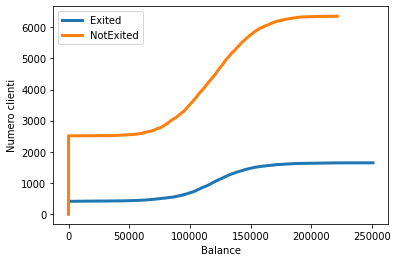

In [13]:
#Mostro il numero di clienti che hanno lasciato/non hanno lasciato la banca al variare dei valori continui 
#(sull'asse y viene contato il numero di clienti con valore della feature inferire al valore sull'asse x)

#ESEMPIO: Sul grafico del Balance degli usciti (quello qui sotto in arancione), quando la x vale 100000 
#e la y vale 3000, vuol dire che ci sono 3000 clienti con valore Balance minore di 100000 che sono usciti

bal=churn[['Balance', 'Age', 'Exited','NumOfProducts','EstimatedSalary','CreditScore','Tenure']]



Feature='Balance'
x1=bal.query('Exited==1').sort_values(by=[Feature])
x2=bal.query('Exited==0').sort_values(by=[Feature])

a = np.sum(np.tril(np.subtract.outer(-1,x1.Balance.values), k=0)<0, axis=1)
x1['Count'] = a

a = np.sum(np.tril(np.subtract.outer(-1,x2.Balance.values), k=0)<0, axis=1)
x2['Count'] = a

plt.plot(x1[Feature], x1['Count'], label='Exited', linewidth=3)
plt.plot(x2[Feature], x2['Count'], label='NotExited', linewidth=3)
plt.legend()
plt.gca().set(xlabel=Feature, ylabel='Numero clienti')

zeroExited = np.interp(0, x1[Feature],x1['Count'])
zeroNotExited = np.interp(0, x2[Feature],x2['Count'])

highExited = np.interp(200000, x1[Feature],x1['Count'])
highNotExited = np.interp(200000, x2[Feature],x2['Count'])

print('Percentuale non uscite a Balance 0 =')
print(zeroExited/(zeroExited+zeroNotExited)*100)
print()
print('Percentuale non uscite a Balance 200000 =')
print(highExited/(highExited+highNotExited)*100)

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Numero clienti')]

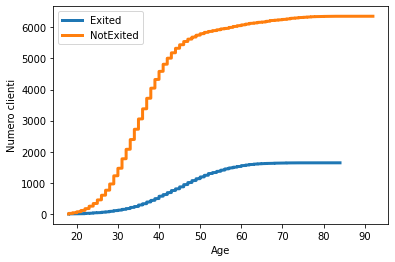

In [14]:
#Attorno al valore 0 di balance, circa il 14% degli rimane nella banca, più avanti sull'asse x, all'aumentare 
#di Balance la percentuale di utenti che rimane aumenta

Feature='Age'
x1=bal.query('Exited==1').sort_values(by=[Feature])
x2=bal.query('Exited==0').sort_values(by=[Feature])

a = np.sum(np.tril(np.subtract.outer(-1,x1.Balance.values), k=0)<0, axis=1)
x1['Count'] = a

a = np.sum(np.tril(np.subtract.outer(-1,x2.Balance.values), k=0)<0, axis=1)
x2['Count'] = a

plt.plot(x1[Feature], x1['Count'], label='Exited', linewidth=3)
plt.plot(x2[Feature], x2['Count'], label='NotExited', linewidth=3)
plt.legend()
plt.gca().set(xlabel=Feature, ylabel='Numero clienti')

[Text(0.5, 0, 'NumOfProducts'), Text(0, 0.5, 'Numero clienti')]

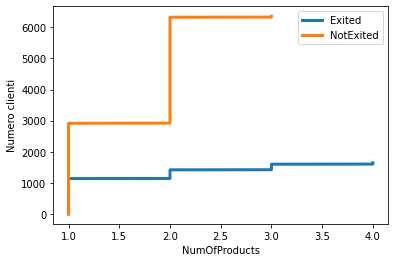

In [15]:
#Con l'aumentare dell'età, aumentano sia gli utenti che rimangono sia quelli che abbandonano
#In percentuale, quelli che rimangono aumentano all'aumentare dell'età

Feature='NumOfProducts'
x1=bal.query('Exited==1').sort_values(by=[Feature])
x2=bal.query('Exited==0').sort_values(by=[Feature])

a = np.sum(np.tril(np.subtract.outer(-1,x1.Balance.values), k=0)<0, axis=1)
x1['Count'] = a

a = np.sum(np.tril(np.subtract.outer(-1,x2.Balance.values), k=0)<0, axis=1)
x2['Count'] = a

plt.plot(x1[Feature], x1['Count'], label='Exited', linewidth=3)
plt.plot(x2[Feature], x2['Count'], label='NotExited', linewidth=3)
plt.legend()
plt.gca().set(xlabel=Feature, ylabel='Numero clienti')

[Text(0.5, 0, 'EstimatedSalary'), Text(0, 0.5, 'Numero clienti')]

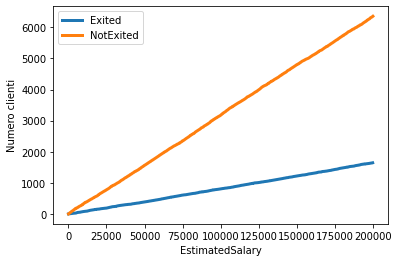

In [16]:
#Superati i 2 prodotti c'è un netto aumento di fedeltà verso la nostra banca. Da lì in poi questo non succede più
#Le uscite salgono invece leggermtnte con ogni nuovo prodotto
#L'utilizzo di più prodotti, nel complesso, sembra aumentare la fedeltà

Feature='EstimatedSalary'
x1=bal.query('Exited==1').sort_values(by=[Feature])
x2=bal.query('Exited==0').sort_values(by=[Feature])

a = np.sum(np.tril(np.subtract.outer(-1,x1.Balance.values), k=0)<0, axis=1)
x1['Count'] = a

a = np.sum(np.tril(np.subtract.outer(-1,x2.Balance.values), k=0)<0, axis=1)
x2['Count'] = a

plt.plot(x1[Feature], x1['Count'], label='Exited', linewidth=3)
plt.plot(x2[Feature], x2['Count'], label='NotExited', linewidth=3)
plt.legend()
plt.gca().set(xlabel=Feature, ylabel='Numero clienti')

[Text(0.5, 0, 'CreditScore'), Text(0, 0.5, 'Numero clienti')]

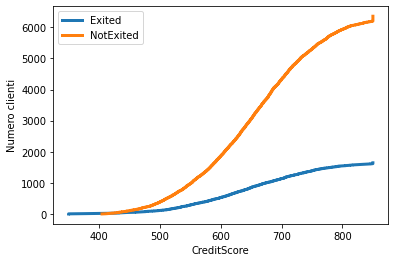

In [17]:
#L'andamento di quest'ultimo grafico è molto lineare
#all'aumentare del salario stimato, gli utenti tendono sempre più a rimanere
#ma al contempo salgono anche le uscite purtroppo
#Nel bilancio, all'aumentare del salario stimato c'è un miglioramento del rapporto tra uscite e non uscite

Feature='CreditScore'
x1=bal.query('Exited==1').sort_values(by=[Feature])
x2=bal.query('Exited==0').sort_values(by=[Feature])

a = np.sum(np.tril(np.subtract.outer(-1,x1.Balance.values), k=0)<0, axis=1)
x1['Count'] = a

a = np.sum(np.tril(np.subtract.outer(-1,x2.Balance.values), k=0)<0, axis=1)
x2['Count'] = a

plt.plot(x1[Feature], x1['Count'], label='Exited', linewidth=3)
plt.plot(x2[Feature], x2['Count'], label='NotExited', linewidth=3)
plt.legend()
plt.gca().set(xlabel=Feature, ylabel='Numero clienti')

[Text(0.5, 0, 'Tenure'), Text(0, 0.5, 'Numero clienti')]

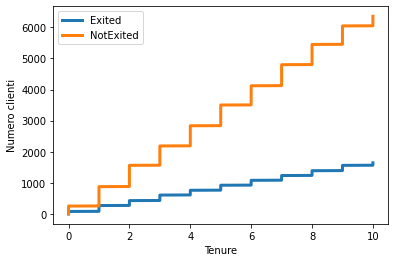

In [18]:
# Anche questa volta, come potevamo aspettarci, all'aumentare del CreditScore, 
# gli utenti tendono a rimanere

Feature='Tenure'
x1=bal.query('Exited==1').sort_values(by=[Feature])
x2=bal.query('Exited==0').sort_values(by=[Feature])

a = np.sum(np.tril(np.subtract.outer(-1,x1.Balance.values), k=0)<0, axis=1)
x1['Count'] = a

a = np.sum(np.tril(np.subtract.outer(-1,x2.Balance.values), k=0)<0, axis=1)
x2['Count'] = a

plt.plot(x1[Feature], x1['Count'], label='Exited', linewidth=3)
plt.plot(x2[Feature], x2['Count'], label='NotExited', linewidth=3)
plt.legend()
plt.gca().set(xlabel=Feature, ylabel='Numero clienti')

In [19]:
# A quanto pare, la nostra banca fa un buon lavoro nel mettere le persone a proprio agio nel lungo termine
# Più passa il tempo, meno i clienti vogliono cambiare banca

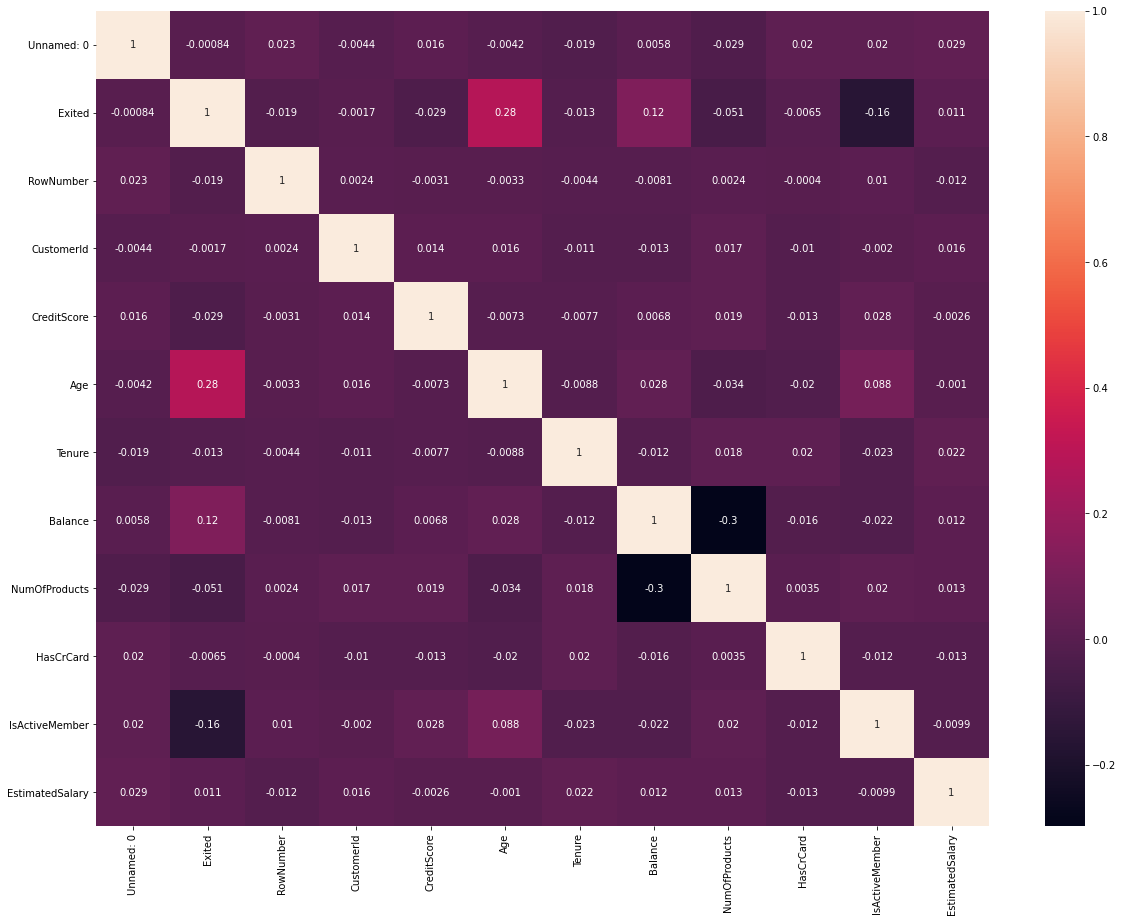

In [20]:
#Controllo a questo punto se ci sono forti correlazioni tra features, in particolare con la feature Exited

def correl(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,15))
    corr = dataframe.corr()
    if (show_chart):
        sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
    return corr

correlation_df = correl(churn,show_chart=True)

In [21]:
#Le correlazioni non presentano valori particolarmente alti
#Sembra che la correlazione più forte di Exited sia con l'età, con un valore 0,28
#Ordino i valori di correlazione in ordine decrescente

correl(churn, show_chart=False)["Exited"].sort_values(ascending=False)

Exited             1.000000
Age                0.283173
Balance            0.118418
EstimatedSalary    0.010889
Unnamed: 0        -0.000842
CustomerId        -0.001739
HasCrCard         -0.006471
Tenure            -0.013352
RowNumber         -0.018759
CreditScore       -0.029307
NumOfProducts     -0.051009
IsActiveMember    -0.156560
Name: Exited, dtype: float64

<Figure size 1440x1080 with 0 Axes>

# Preparazione dati

In [22]:
#Le features testuali, come il paese, vanno convertiti in valori numerici affinché il modello possa interpretarle

trainRelevant=train[parametri]
testRelevant=test[parametri]

trainRelevant

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,620,Spain,Male,38,0,0.00,2,1,1,38015.34,0
1,589,France,Female,37,6,138497.84,1,0,1,18988.58,0
2,529,France,Female,31,2,164003.05,2,1,1,60993.23,0
3,555,France,Male,37,9,124969.13,1,1,0,60194.05,0
4,702,Spain,Female,38,2,0.00,1,1,1,161888.63,0
...,...,...,...,...,...,...,...,...,...,...,...
6395,652,France,Male,31,2,119148.55,1,0,0,149740.22,0
6396,757,France,Male,23,2,80673.96,2,1,0,93991.65,0
6397,678,France,Female,32,5,0.00,2,1,0,90284.47,0
6398,726,France,Female,38,4,0.00,2,0,0,6787.48,0


In [23]:
trainRelevant.loc[trainRelevant.HasCrCard == 0, 'HasCrCard'] = -1
testRelevant.loc[trainRelevant.HasCrCard == 0, 'HasCrCard'] = -1
trainRelevant.loc[trainRelevant.IsActiveMember == 0, 'IsActiveMember'] = -1
testRelevant.loc[trainRelevant.IsActiveMember == 0, 'IsActiveMember'] = -1

lista = ['Geography', 'Gender']
remove = list()
for i in lista:
    if (trainRelevant[i].dtype == np.str or trainRelevant[i].dtype == np.object):
        for j in trainRelevant[i].unique():
            trainRelevant[i+'_'+j] = np.where(trainRelevant[i] == j,1,-1)
        remove.append(i)
trainRelevant = trainRelevant.drop(remove, axis=1)


for i in lista:
    if (testRelevant[i].dtype == np.str or testRelevant[i].dtype == np.object):
        for j in testRelevant[i].unique():
            testRelevant[i+'_'+j] = np.where(testRelevant[i] == j,1,-1)
        remove.append(i)
testRelevant = testRelevant.drop(remove, axis=1)

trainRelevant

/home/g/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/g/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/g/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Male,Gender_Female
0,620,38,0,0.00,2,1,1,38015.34,0,1,-1,-1,1,-1
1,589,37,6,138497.84,1,-1,1,18988.58,0,-1,1,-1,-1,1
2,529,31,2,164003.05,2,1,1,60993.23,0,-1,1,-1,-1,1
3,555,37,9,124969.13,1,1,-1,60194.05,0,-1,1,-1,1,-1
4,702,38,2,0.00,1,1,1,161888.63,0,1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,652,31,2,119148.55,1,-1,-1,149740.22,0,-1,1,-1,1,-1
6396,757,23,2,80673.96,2,1,-1,93991.65,0,-1,1,-1,1,-1
6397,678,32,5,0.00,2,1,-1,90284.47,0,-1,1,-1,-1,1
6398,726,38,4,0.00,2,-1,-1,6787.48,0,-1,1,-1,-1,1


In [24]:
#divido dataset

X_test = testRelevant.drop(columns=['Exited'])
y_test = testRelevant['Exited']

X_train = trainRelevant.drop(columns=['Exited'])
y_train = trainRelevant['Exited']

# Modello

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predizione risultati successivi
y_pred = classifier.predict(X_test)

# Valutazione accuracy del modello
accuracy_score(y_test,y_pred)

0.766875

In [26]:
#Faccio un paio di predictions di prova

CreditScore=716
Age=50
Tenure=2
Balance=119600
NumOfProducts=1
HasCrCard=1
IsActiveMember=1
EstimatedSalary=12944
Geography_Germany=1
Geography_France=-1
Geography_Spain=-1
Gender_Male=1
Gender_Female=-1

prediction = classifier.predict([[CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female]])
print(prediction)



CreditScore=800
Age=40
Tenure=5
Balance=1000000
NumOfProducts=2
HasCrCard=1
IsActiveMember=1
EstimatedSalary=200000
Geography_Germany=1
Geography_France=-1
Geography_Spain=-1
Gender_Male=1
Gender_Female=-1

prediction = classifier.predict([[CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female]])
print(prediction)

[0]
[1]


In [27]:
#esporto il modello in un file joblib

import joblib
joblib.dump(classifier, 'ChurnClassifier.joblib')

['ChurnClassifier.joblib']

In [28]:
#A questo punto, il modello può essere richiamato attraverso il comando

model = joblib.load('ChurnClassifier.joblib')

#Verifico che funzioni

pred1=model.predict([[CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female]])
print(pred1)

CreditScore=716
Age=50
Tenure=2
Balance=119600
NumOfProducts=1
HasCrCard=1
IsActiveMember=1
EstimatedSalary=12944
Geography_Germany=1
Geography_France=-1
Geography_Spain=-1
Gender_Male=1
Gender_Female=-1

pred2=model.predict([[CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female]])
print(pred2)

[1]
[0]
